# EDA To Prediction _ DieTanic

somtimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden vayage, the Titanic sank after colliding with an iceberg, kiling 1502 out of 2224 passengers and crew. That's why the name **DieTanic**. This is a very unoforgetable disaster that no one in the world can forget.

 It took about \$7.5 million to build the Titanic and it sunk under the occean due to collison. 

The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem.** How do we check features, hwo do we add new features and some Machine Learning Concepts. 

# Contnets of the Note book

## Part1 : Exploratory Data Analysis EDA

1) Analysis of the features.

2) Finding any relations or trends considering multiple featues.


## Part2 : Feature Engineering and Data Cleaning:

1) Adding any few features.

2) Removing redundant features.

3) Converting features into suitable form for modeling.

## Part3 : Predictive Modeling

1) Runnig Basic Algorithms

2) Cross Validations.

3) Ensembling.

4) Important Features Extrcation.


## Part1 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [5]:
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them

### How many Survived?

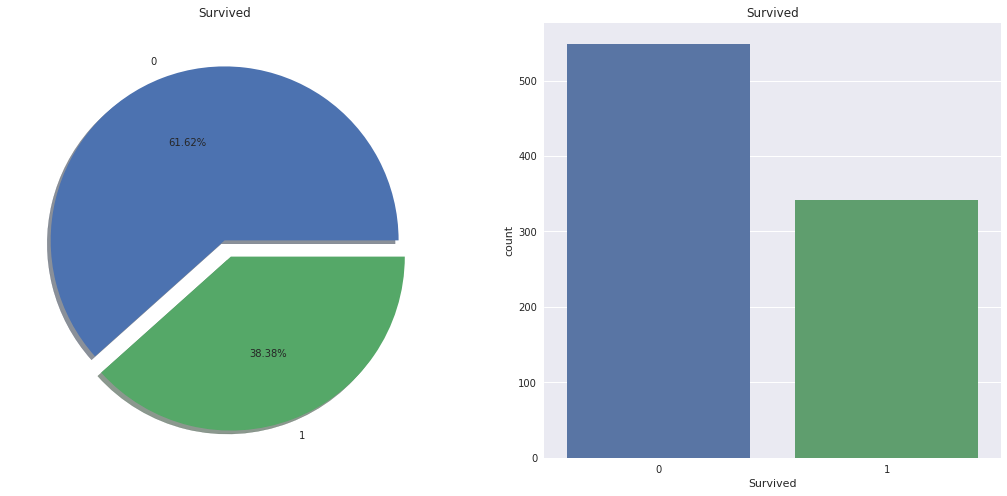

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [7]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
data.shape[0]

891

In [9]:
data['Survived'].value_counts()/data.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

It's evident that not many passengers survive the accident.

Out of 891 passengers in training set, only around 350 survive di.e. Only 38.4% of the totla training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who did not.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.

First let us understand the different types of features.

### Types of Features

#### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For examle, gender is a categorical variabl having two categories. Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variable.

##### Categorical Features in the dataset : Sex, Embarked.

#### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between tehm is that we can have relative ordering or sorting between the values. For eg : If we have a feature like **Height** wih values **Tall, Medium, Shrot**, then height is a ordinal variable. Here we can have a relative sort in the varialbe.

##### Ordinal Features in the dataset : PClass

#### Continuous Features:
A feature is said to be con tinuous if it can take values between any two points or between the minimum or maximum values in the features column.

##### continuous Features in the dataset : Age

### Analysing The Features

#### Sex $\rightarrow$ Categorical Feature

In [10]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

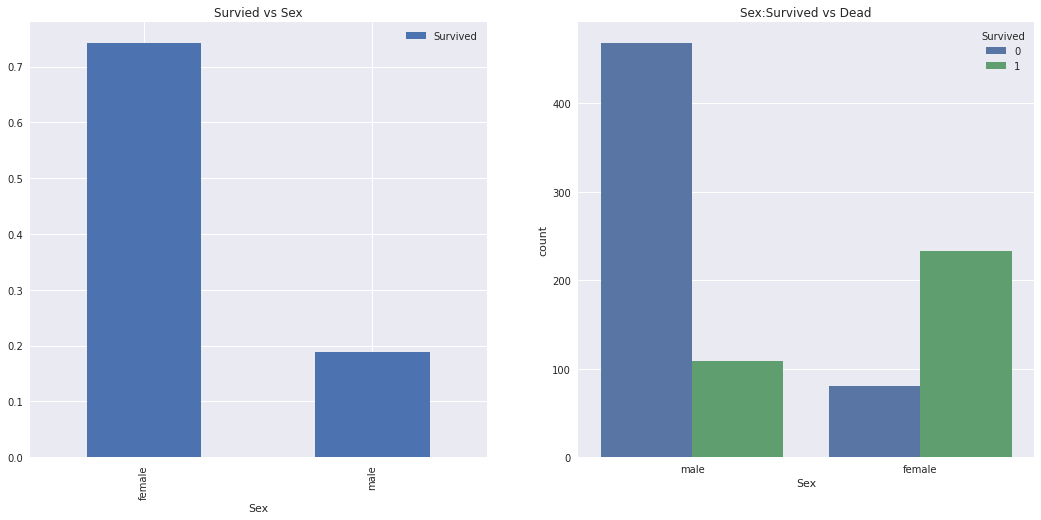

In [11]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survied vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()


In [12]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


This looks interesting. the number of mean on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of makes saved. The survival rates for a women on the ship is around 75\% while that for men in around 18-19\%.



This looks to be a very important feature for modeling.

But is it the best?? Lets check other features.

### Pclass $\rightarrow$ Ordinal Feature

In [13]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


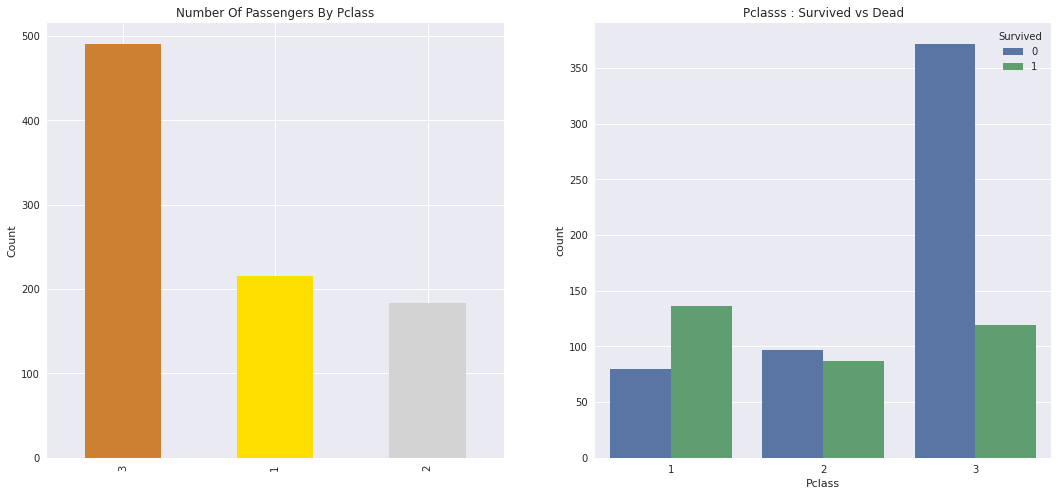

In [14]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclasss : Survived vs Dead')
plt.show()

In [15]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
data.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

people say Money cannot buy everything. But we can celarly see that passengers of pclass 1 were given a very high priority while rescue. Even though the number of passengers in pclass3 were a lot higher, still the number of survival from them is very low, somehwere around 25%

In [17]:
print('the survival rate for pcalss 1 : ', 136/(80+136))
print('the survival rate for pcalss 3 : ', 119/(372+119))

the survival rate for pcalss 1 :  0.6296296296296297
the survival rate for pcalss 3 :  0.24236252545824846


For pclass 1 survival rate is aroudn 63% while for pclss2 is aroudn 48%. 
So money and status matters. Such a materialistic world.

Let's dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** together.

In [18]:
pd.crosstab([data.Sex,data.Survived],data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

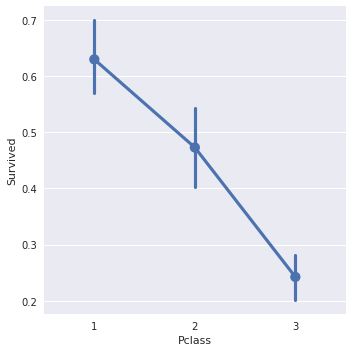

In [19]:
sns.factorplot('Pclass','Survived',data=data)

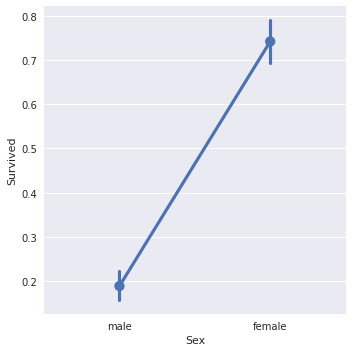

In [20]:
sns.factorplot('Sex','Survived',data=data)

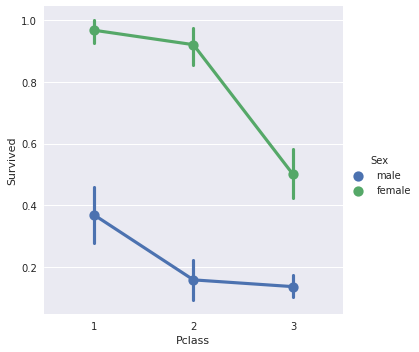

In [21]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for women from pclass  1 is aoubt 95%, as only 3 out of 94 women from pclass 1 died.

It's evident that irrespective of pclass, women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Let's analysis other features.

### Age $\rightarrow$ Continuous Feature

In [22]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

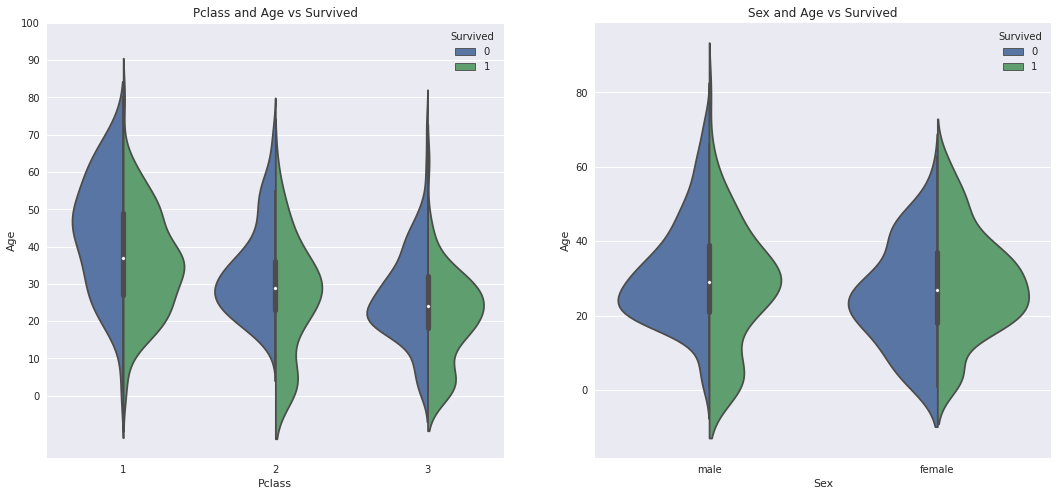

In [23]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=data,split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age','Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
plt.show()

##### Observations : 
1) The number of children increases with pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the Pclass

2) Survival chances for Passengers aged 20-50 from pclass 1 high and is ven better for women.

3) For males, the survival chances decreases with an increase in age

In [24]:
sum(data['Age']<=10)

64

In [25]:
data[data['Age']<=10].groupby(['Survived'])['Survived'].count()
print(38/(26+38))

0.59375


In [26]:
data[data['Age']>10].groupby(['Survived'])['Survived'].count()
print(252/(252+398))

0.38769230769230767


As we had seen earlier, Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the data set.

But the problem is there wer emany people with many diferent ages. We just assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age band does the passenger lie??

we can check the Name feature.
Looking upon the feature, we can see that the names ahve a salutation like Mr or Mrs. Thus we can assign the mean values of r and mrs to the respective groups.

### \" What's in a nae?\" $\rightarrow$ Feature :p

In [27]:
data.Name.str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [28]:
data['Initial'] = 0 
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
    #lets extract the Salutations

In [29]:
data.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

Okay so here we are using the Rgex : **[A-Za-z]+\.** So hat it does is, it looks for strings which like between A-Z or a-z and followd by a dot. so we successfullly extract the Initials from the Name.

In [30]:
pd.crosstab(data.Initial, data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. 
I will replace them with Miss and same thing for other values.

In [31]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [32]:
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [33]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [34]:
data.Age.isnull().any() #So no null values left finally 

False

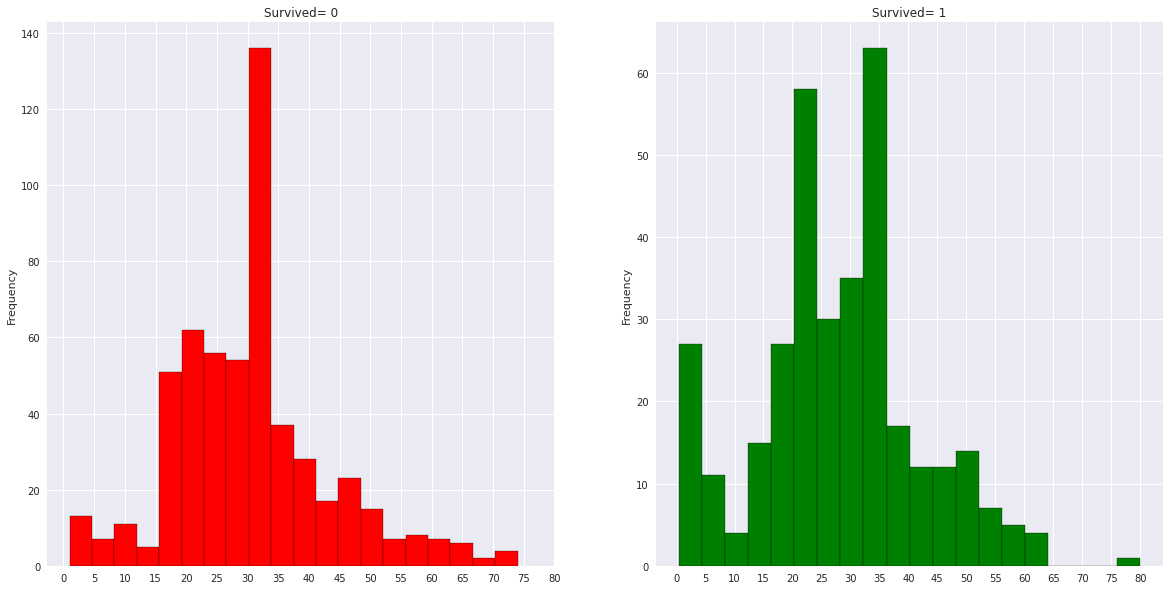

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Observations : 
1) Tha Toddelers(Age<5) were saved in large numbers(The Women and Child First Policy)

2) The oldest Passenger was saved(80 years).

3) Maximum number of deaths were in the age group of 30-40

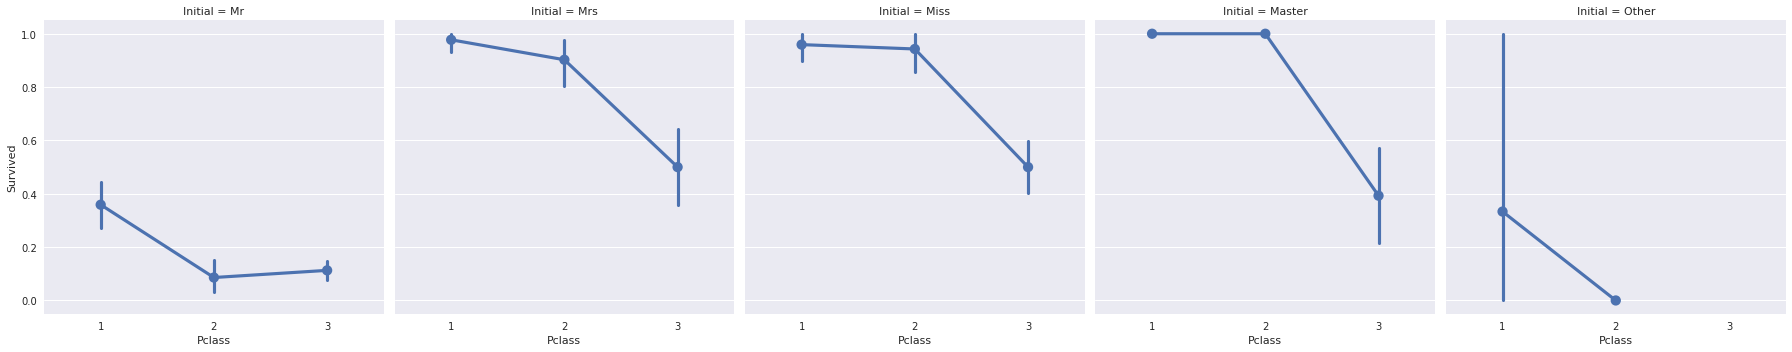

In [36]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

The Women and Child first policy thus hods true irrespective of the class

## Embarked $\rightarrow$ Categorical Value

In [37]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

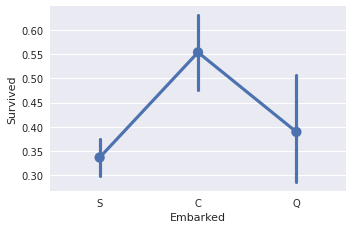

In [38]:
sns.factorplot('Embarked','Survived',data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S

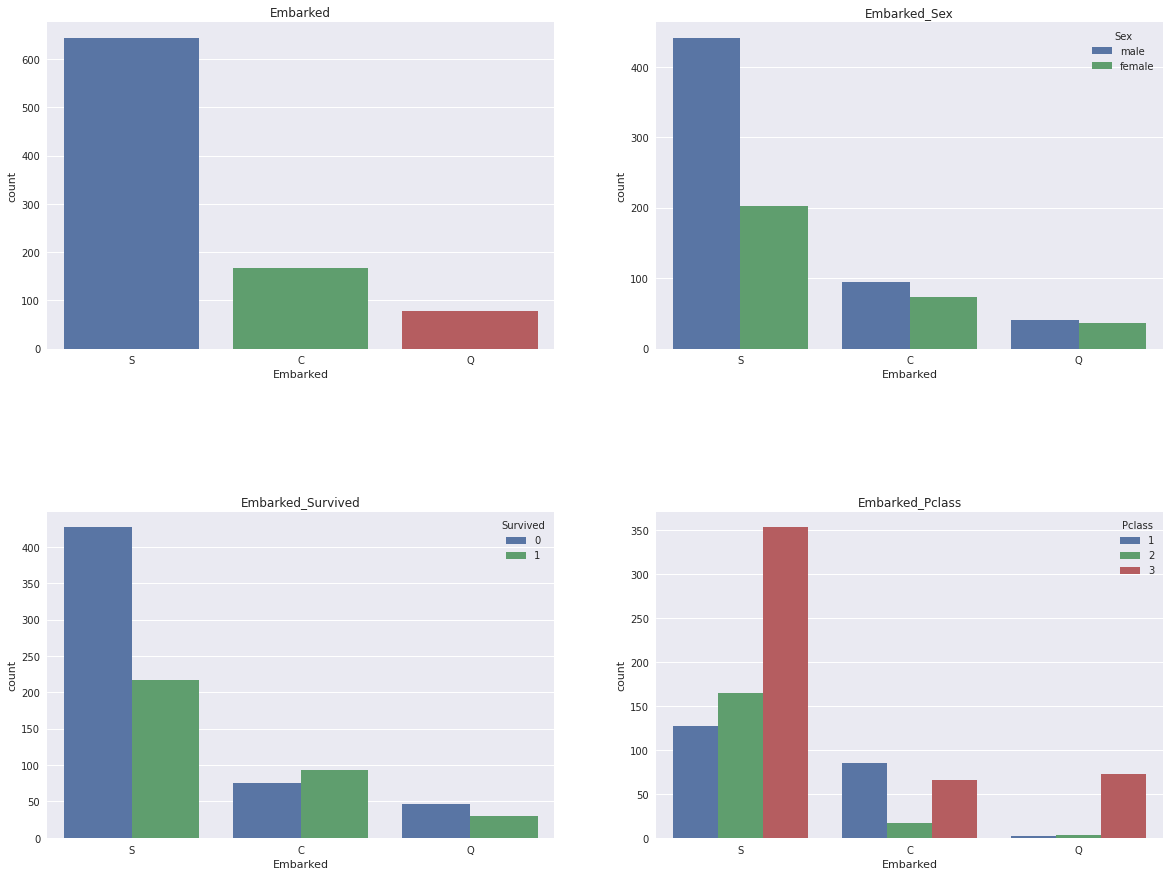

In [39]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('Embarked')

sns.countplot('Embarked',hue = 'Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Embarked_Sex')

sns.countplot('Embarked',hue = 'Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked_Survived')

sns.countplot('Embarked',hue = 'Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked_Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Observations : 
1) Maximum passengers boarded from S. Majority of them beinf from Pclass3.

2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclasss1 and Pclass2 Passengers.

3) The Embark S looks to the port from where majority of the rich people boarded. Still the cahnces for survivla is low here. that is because many passengers from Pclass3 around 81% did not usrvive.

4) Port Q had almost 95% of the passsengers were from Pclass3.

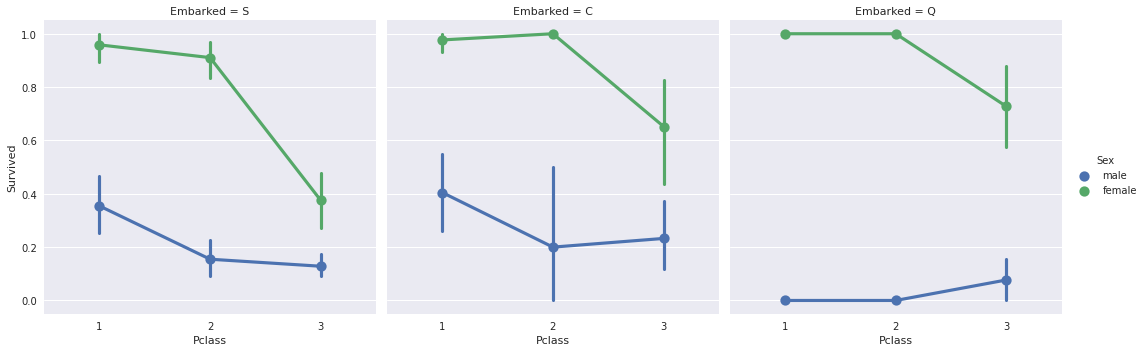

In [40]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

#### Observations: 

1) The survival chances are almost 1 or women for Pclass1 and Pcalss 2 irrespective of the pcalss

2) Port S loooks to be very unluck for Pclass 3 Passengers as the survival rate for both men and women is very low 
Money Mattesr

3) Port Q looks to be unlukies for MEn as alomost all were form pclass 3


## Filling Embarked Nan

as we saw the maximun passengers boarded from Port S, we replace Nan with S**

In [41]:
data['Embarked'].fillna('S',inplace=True)

In [42]:
data['Embarked'].isnull().sum()
#data.Embarked.isnull().any()# Finally No NaN values

0

## SibSipb $\rightarrow$ Discrete Feature

This feature represents whether a person is alon eor with his family members.

Sibling = brother, sister, stepbroher, stepsister

Spouse  = housband, wife

In [43]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


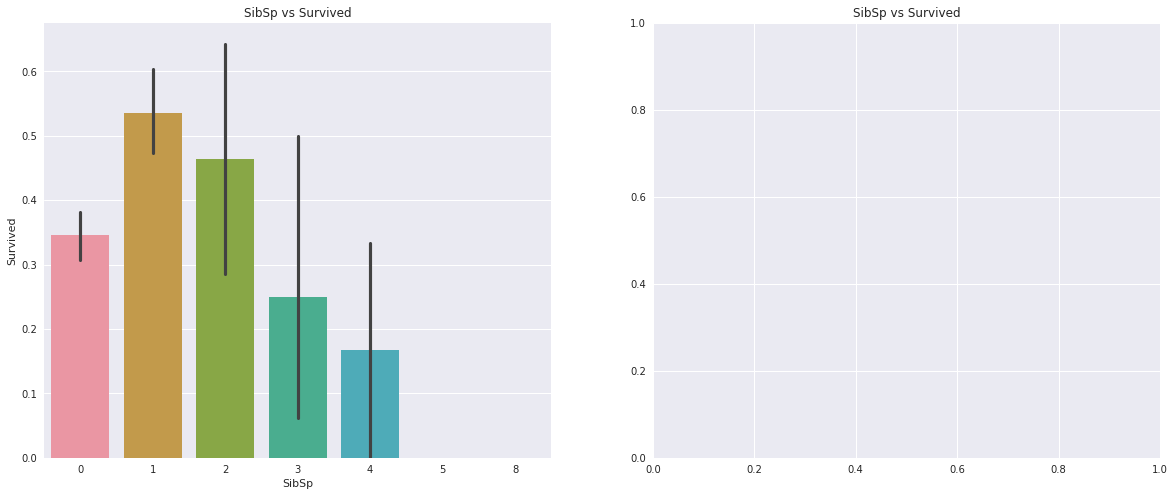

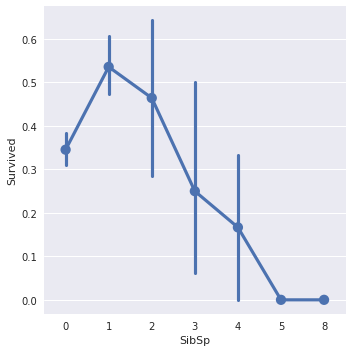

In [44]:
f, ax=  plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data, ax= ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data, ax= ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [45]:
pd.crosstab(data.SibSp,data.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Observations : 
The barplot and factorplot shows that if a passenger is alone on board with no siblings,
he have 34.5% survival rate.

The graph roughly decreases if the number of siblings increase.

This maeks sense. Tht si, if I have a famly on board, I will try to save them instead of saving myself fist. Surprisingly the survival for families with 5-8 members is 0%. the reason may be pclass??

the reason is Pclass. the crosstab shows that person with SibSp>3 were all in Pclass 3. It is imminent hat all the large family in pcalss3 died.




In [46]:
sum(data[data['SibSp']== 0]['Survived'] == 1)

210

In [47]:
data[data['SibSp']== 0].Survived.count()

608

In [48]:
sum(data[data['SibSp']== 0]['Survived'] == 1)/data[data['SibSp']== 0].Survived.count()

0.34539473684210525

## Parch

In [49]:
pd.crosstab(data.Parch,data.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

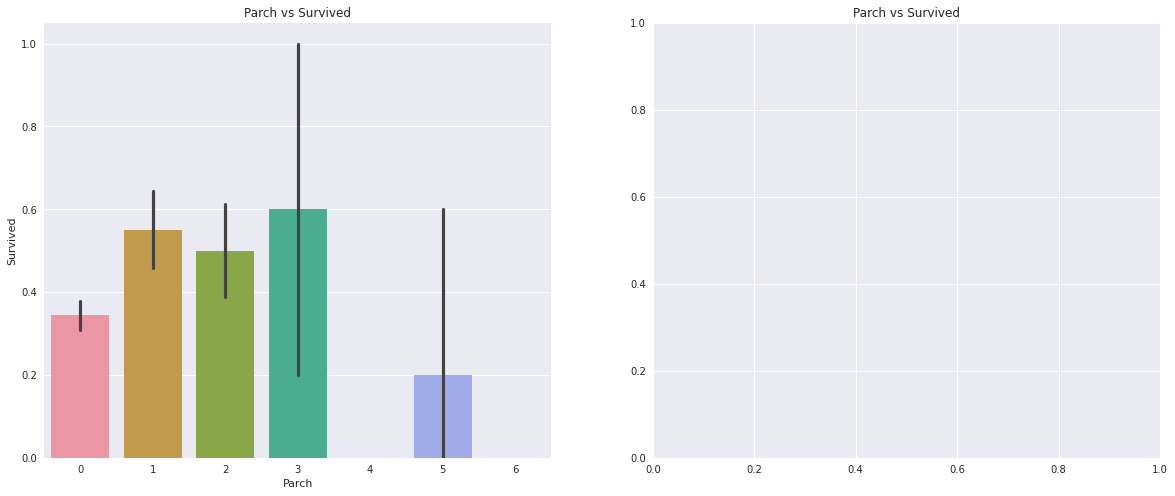

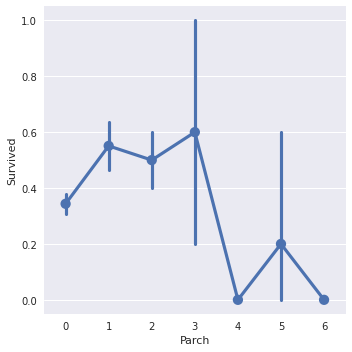

In [50]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

### Observations : 
Here too the results are quite similar. Passengers with their parents onbaord have greater chnace of survivval. It howver reduces as the number goes up.

The chnaces of survival is good for somebody who has 1-3 parents on the ship. Bieng alno ealso proves to be fatal and the chance for survival decrease when somebody has >4 parents on the ship

## Fare $\rightarrow$ Continuous Feature

In [51]:
print(data.Fare.describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


The lowest fare is 0.0. 
Whow!! a free lucxorious ride.

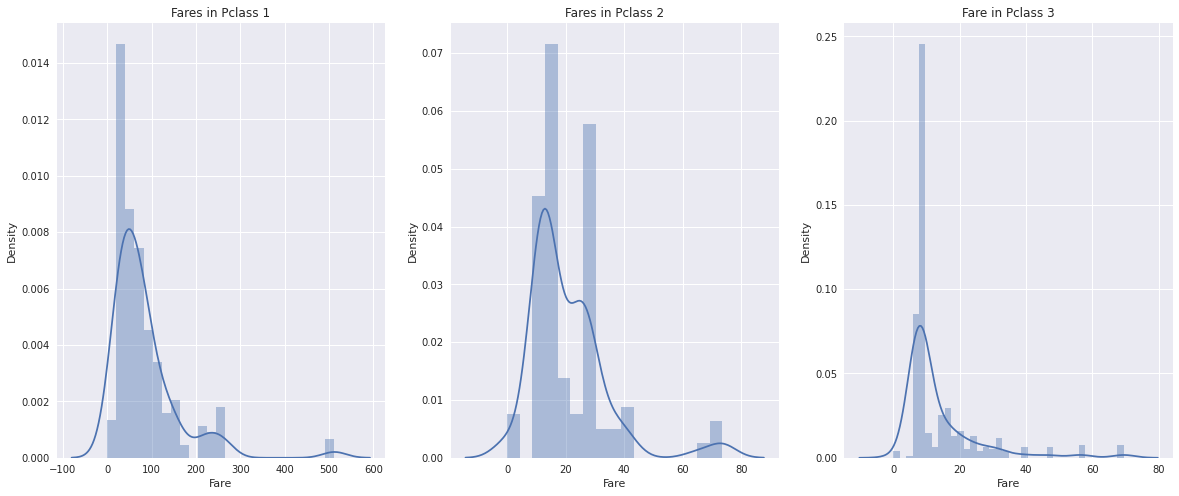

In [52]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data["Pclass"]==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')

plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continuous, we can convert into discrete values by using binning.

## Observations in a Nutshell for all features:

**Sex :** The chance of survival for women is high as compared to men.

**Pclass :** There is a visible trend that being a **1st class passenger** gives you better chacnes of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**. **Money Wins!!!!**

**Age** : Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked** : This is a very interesting features. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass 3**.

**Parch + SibSp :** Having 1-2 siblings, spouse on board or 1-3 parents shows a greater chance of probability rather than being alone or having a large family traveling with you.

## Correlatino Between The Features

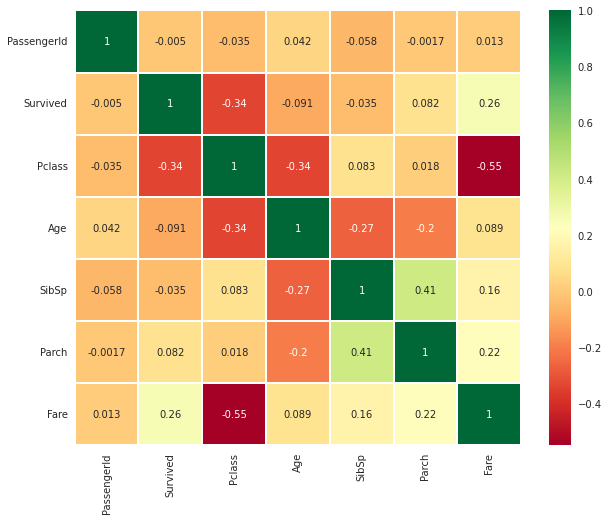

In [53]:
#data.corr() --> correlatino matirx
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn',linewidths=0.2)

fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understading the plot, let us see what exactl correlations is.

**POSITIVE CORRELATION** IF an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive corelation.

**NEGATIVE CORRELATIN** : IF an increase in feature A leads to decrease in feature B, then they are negatively correlatied. A value -1 means perfect negative correlations.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

So do you think we should use obth of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see taht the features are not much correlated. The highest correlation is between **SibSp and Parch i.e. 0.41**. So we can carry on with all feauters.

# Part2. Featrue Engineering and Data Cleaning

Now, what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initials feature using the Name Feature. Let's see if we can get any new features and eliminate a few. Also we will transform the existing relevant features to suitable form for Predictive Modeling.

### Age_bnad
#### Problem With Age Feature:
As I have mentioned earlier that **Age is a continuous feature**, there is a problem with Continuous Variables in Machine learning Models.

**Eg** : If I say to group or arrange Sports Person by **Sex**, We can easily segregate them by Male and Female.

Now if I say to group them by their **Age**, then how would you do it?
If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these **continous values into categorical values** by eighter Binnign or Normalisations. I will be using binning i.e. group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divde the range from 0-80 into 5 bins. So 80/5 = 16. So bins of size 16

In [54]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [55]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#checking the number of passengers in each age bnad.

,Age_band
1,382
2,325
0,104
3,69
4,11


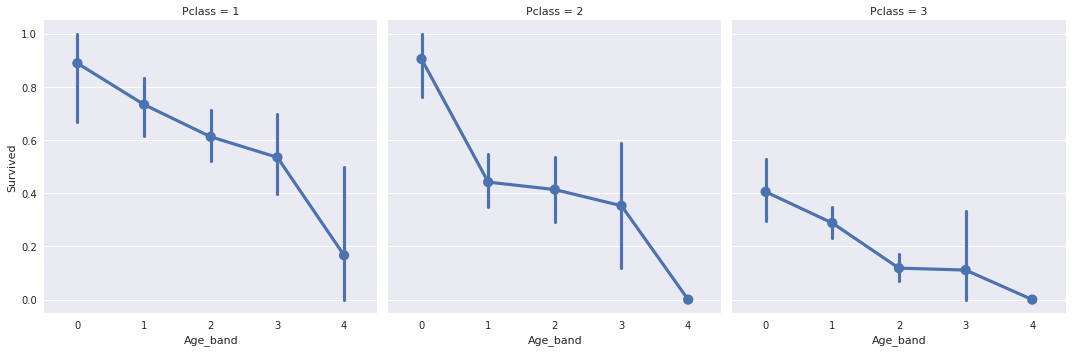

In [56]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

True that... the survival rate decreases as the age increases irrespective of the Pclass.

## Famly_Size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It give us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [57]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
#family size 
data['Alone'] = 0
data.loc[data.Family_Size==0,'Alone']=1 #Alone

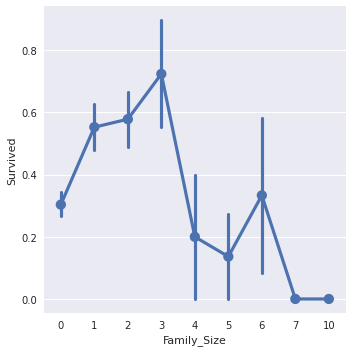

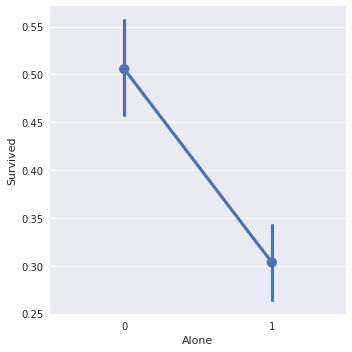

In [58]:
f,ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(0)
plt.close(1)
plt.show()

**Family_Size=0 means that the passenger is alone.** Clearly, if you are alone or family_size=0, then chances for survival is very low. For family size > 4 the chances decrease too. This also looks to be an important feature for the model. Let's examine this further.

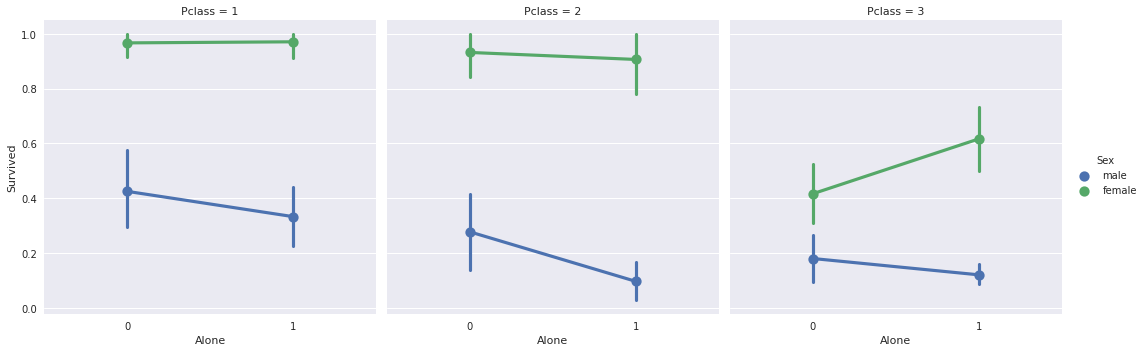

In [59]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

## Fare_Range

Since fare is also a continuous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut**.

So what **qcut** does is it splits or arranges the values accoring the number of bins we have passed. So if we pass for 5 bins, it will arnge the values equally spaced into 5 seperate bins or value ranges.

In [60]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [61]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.Fare_Range.unique()
data['Fare_Range']
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [62]:
pd.crosstab([data.Fare_Range,data.Pclass],[data.Survived],margins=True)

Survived                  0    1  All
Fare_Range      Pclass               
(-0.001, 7.91]  1         6    0    6
                2         6    0    6
                3       167   44  211
(7.91, 14.454]  2        53   33   86
                3       103   35  138
(14.454, 31.0]  1        24   27   51
                2        28   42   70
                3        69   32  101
(31.0, 512.329] 1        50  109  159
                2        10   12   22
                3        33    8   41
All                     549  342  891

As discussed above, we can clearly see taht s the **fare_range increases, the chances of usrvival increase**.

Now we cannot pass the Fare_Range values as it is. We should convert it into sigleton values same as we did in **Age_Band**

In [63]:
data['Fare_cat']=0
data.loc[data['Fare'] <=7.91,'Fare_cat']=0
data.loc[(data['Fare'] >7.91) & (data['Fare']<= 14.454 ), 'Fare_cat']=1
data.loc[(data['Fare'] >14.454) & (data['Fare']<= 31), 'Fare_cat']=2
data.loc[(data['Fare'] >31) & (data['Fare']<= 513), 'Fare_cat']=3

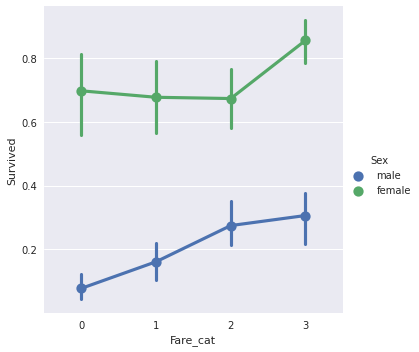

In [64]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

## Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values

In [65]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Initial          object
Age_band          int64
Family_Size       int64
Alone             int64
Fare_Range     category
Fare_cat          int64
dtype: object

In [66]:
print(data.Embarked.unique())
print(data.Initial.unique())
print(data.Sex.unique())

['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['male' 'female']


In [67]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [68]:
print(data.Embarked.unique())
print(data.Initial.unique())
print(data.Sex.unique())

[0 1 2]
[0 1 2 3 4]
[0 1]


## Dropping UnNeeded Features
**Name** --> We do not need name feature as it cannot be converted into any categorical value.

**Age** --> We ahve the Age_band feature, so no need of this.

**Ticket** --> It is any random string that cannot be categorised.

**Fare** --> We have the Fare_cat feature, so unneeded

**Cabin** --> A lot of NaN values and also many passengers ahve multiple cabins So this is auseless feature.

**Fare_Range** --> We have the fare_cat feature

**PassengerId** --> Cannot be categorised

In [69]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)


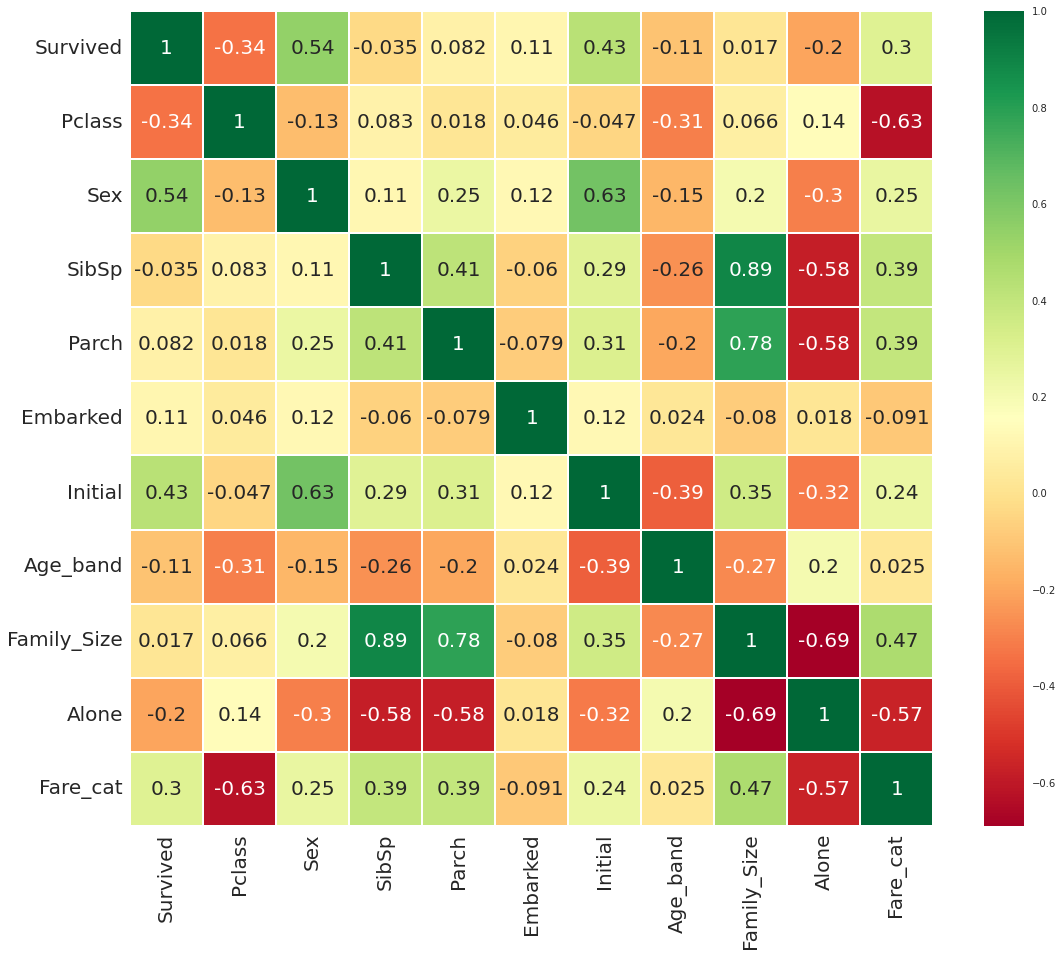

In [70]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Now the above correlation plot, we can see some positivel related features. Some of them being **SibSp and Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size**. 

# Part3. Predictive Modeling
We have gained some insights from the EDA part.
But with that, we cannot acurately predict or tell whether a passenger will survvie or die.
So now we will predict the whether the Passenger will survvie or not using some great Classificaton Algorithms. Follonw are the algorithms I will use to make the model.

1) Logistic REgression

2) Support Vector Machines (Linear and radial)

3) Random Forest
4) K-Nearest Neighbors

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

In [71]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [72]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## Radial Support Vector Machines(rbf-SVM)

In [73]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [74]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [75]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


Decision Tree

In [76]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


### K-Nearest Neighbours(KNN)

In [77]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Lets check the accuracies over various values of n_neighbours.

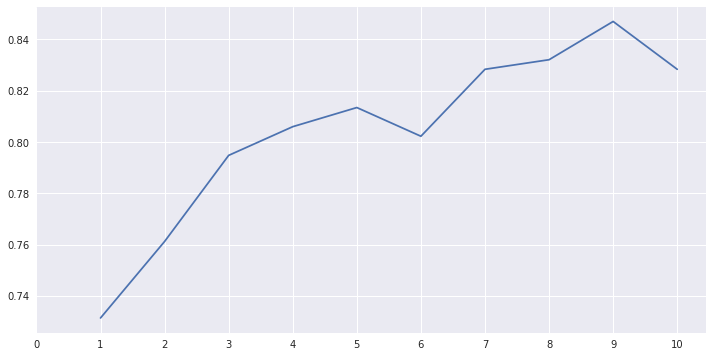

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [78]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [79]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [80]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8246268656716418


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is No, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model,we use Cross Validation.

## Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [81]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.810424,0.045010
Decision Tree,0.810350,0.026602
Naive Bayes,0.801386,0.028999
Random Forest,0.810375,0.036066


<AxesSubplot:>

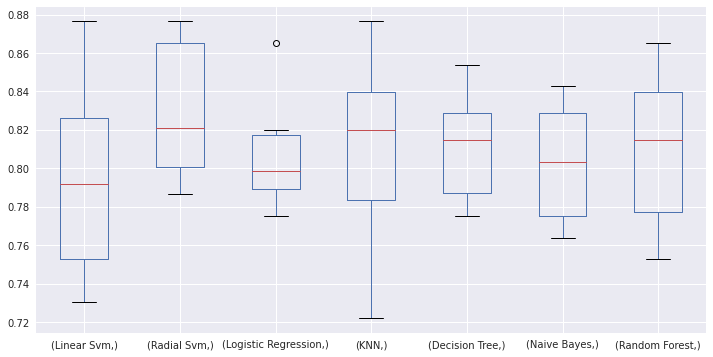

In [82]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

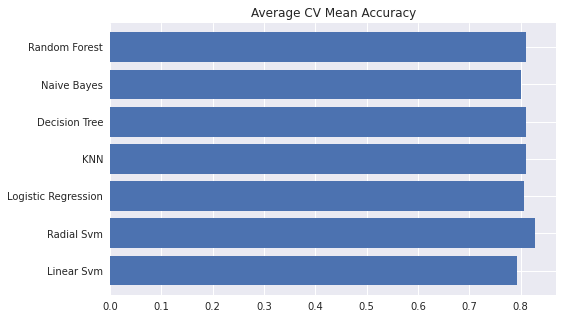

In [83]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

## Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

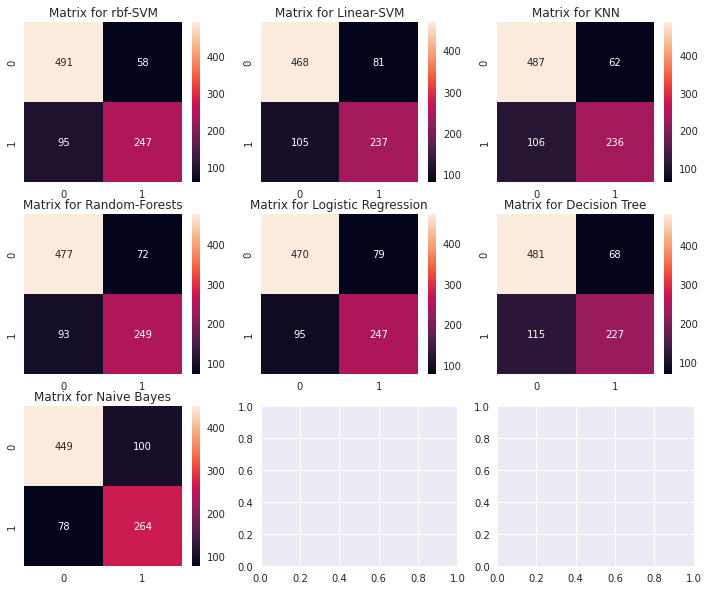

In [84]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

### Hyper-Parameters Tuning
The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

In [85]:
#svm
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [86]:
#random_forests
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for Rbf-Svm is 82.82% with C=0.05 and gamma=0.1. For RandomForest, score is abt 81.8% with n_estimators=900.

# Ensembling

Ensembling is a god way to increase the accuracy or performance of a model. In simple words, it is the combinatino of various simple models to create a single poweful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling. Which improves the stability of the model. Ensembling can be done in ways like:

1) Voting Classifier

2) Bagging

3) Boosting

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the base models are all of different type.

In [87]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state = 0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                              ],
                                  voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is : ',ensemble_lin_rbf.score(test_X,test_Y))

cross = cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring="accuracy")
print("The cross validated score is ", cross.mean())

The accuracy for ensembled model is :  0.8171641791044776
The cross validated score is  0.8249188514357053


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and tehm taking the average of all the predictions. Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classfiers.

## Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbors

In [88]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3), random_state = 0, n_estimators = 700)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)

print('The accuracy for bagged KNN is : ', metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print("The cross validated score for bagged KNN is:",result.mean())

The accuracy for bagged KNN is :  0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


## Bagged Decision Tree

In [89]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)

print('the accuracy for bagged Decision Tree is : ',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring = 'accuracy')
print("The corss validated score for bagged Decision Tree is : ", result.mean())

the accuracy for bagged Decision Tree is :  0.8208955223880597
The corss validated score for bagged Decision Tree is :  0.8171410736579275


## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model. Boosting works as follows:

A model is first trained on the complete dataset. Now the model get some instance right while some wrong. Now in the next iterations, the learning will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continuos, and new clssifiers are added to the model until the limit is reached on the accuracy.

### AdaBoost(Adaptive Boosting)

The weak learner or estimator is this case is a Decision Tree.
But we can chagne the default base_estimator to any algorithm of our choie.

In [90]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print("The cross validated score for AdaBoost is : ", result.mean())

The cross validated score for AdaBoost is :  0.8249188514357055


### Stochastic Gradient Boosting
Here too the weak learner is a Decision Tree

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print("The cross validated score for Gradient Boosting is : ", result.mean())

The cross validated score for Gradient Boosting is :  0.8115230961298376


### XGBoost

In [92]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


We got the highest accuracy for AdaBoost.
We will try to increase it with Hyper-Parameter Tuning

### Hyper-Parameter Tuning for Ada Boost

In [93]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(),param_grid = hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


### Confusion Matrix for the Best Model

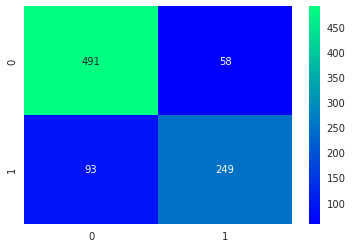

In [94]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

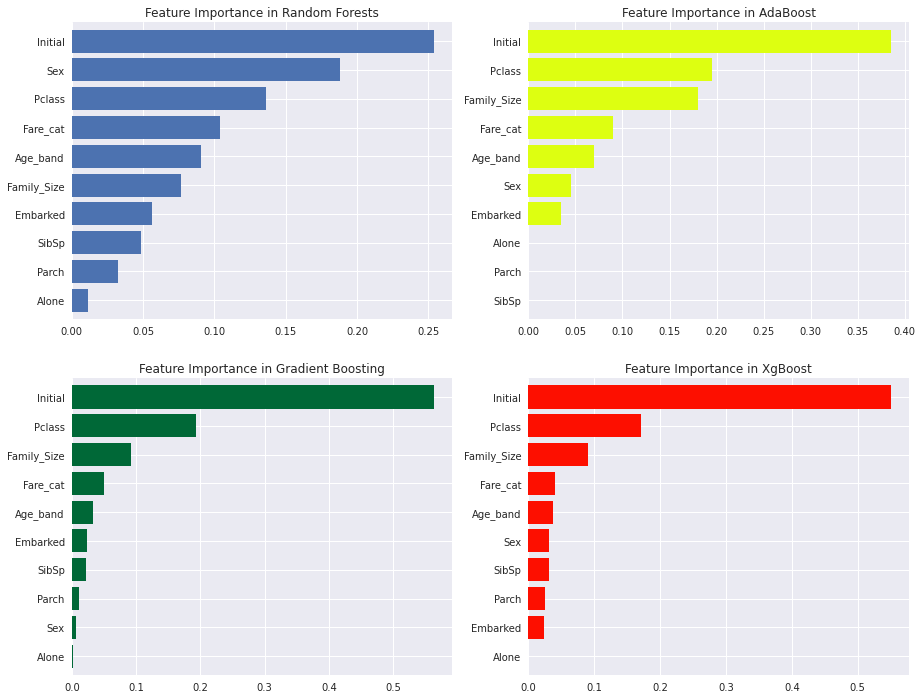

In [95]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()


we can see the important feature for various claasifiers like RandomForests, nAdaBoost, etc.

### Observations : 
1 ) Some fo the common important features are Initial, Fare_cat, Pclass, Family_Size.

2) The Sex feature does not seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a veryh good differentiating factor. Sex looks to be importanact only in RnadomnForests.

However we can see te feature Initial,m which is at the top in may classfiers. We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3) Similarly the Oclass and Fare_cat refer to the status of the passengers and Family_Size with Alnoe, Parch and SibSp.

